In [19]:
# Resource: https://discover.data.vic.gov.au/dataset/all-victorian-sars-cov-2-covid-19-current-exposure-sites
#
# curl -L  https://docs.google.com/spreadsheets/d/e/2PACX-1vSNouXrJ8UQ-tn6bAxzrOdLINuoOtn01fSjooql0O3XQlj4_ldFiglzOmDm--t2jy1k-ABK6LMzPScs/pub\?gid\=1075463302\&single\=true\&output\=csv > data/sites.csv
import requests

url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSNouXrJ8UQ-tn6bAxzrOdLINuoOtn01fSjooql0O3XQlj4_ldFiglzOmDm--t2jy1k-ABK6LMzPScs/pub?gid=1075463302&single=true&output=csv'
res = requests.get(url, allow_redirects=True)
open('data/exposure_sites.csv', 'wb').write(res.content)

import great_expectations as ge

df = ge.read_csv("data/exposure_sites.csv", header=0)

# Expectations

df.expect_table_columns_to_match_ordered_list([
    "Suburb",
    "Site_title",
    "Site_streetaddress",
    "Site_state",
    "Site_postcode",
    "Exposure_date_dtm",
    "Exposure_date",
    "Exposure_time",
    "Notes",
    "Added_date_dtm",
    "Added_date",
    "Added_time",
    "Advice_title",
    "Advice_instruction",
    "Exposure_time_start_24",
    "Exposure_time_end_24"
])

df.expect_column_values_to_be_between(
    column="Site_postcode",
    min_value=0,
    max_value=10000,
)

df.expect_column_values_to_match_regex(
    column='Added_date',
    regex='^[0-9]{1,2}/[0-9]{1,2}/2021'
)

df.expect_column_values_to_match_regex(
    column='Exposure_date',
    regex='^[0-9]{1,2}/[0-9]{1,2}/2021'
)

# Save

suite = df.get_expectation_suite()

df.save_expectation_suite("great_expectations/expectations/default.json", discard_failed_expectations=False)

df.head()


,Suburb,Site_title,Site_streetaddress,Site_state,Site_postcode,Exposure_date_dtm,Exposure_date,Exposure_time,Notes,Added_date_dtm,Added_date,Added_time,Advice_title,Advice_instruction,Exposure_time_start_24,Exposure_time_end_24
0,Maribyrnong,Ariele Apartments,7 Thomas Holmes St,VIC,3032.0,2021-07-08,08/07/2021,1:00pm - 11:59pm,This applies to any person who was present in ...,2021-07-12,12/07/2021,20:30:25,Tier 1 - Get tested immediately and quarantine...,Anyone who has visited this location during th...,13:00:00,23:59:59
1,Maribyrnong,Ariele Apartments,7 Thomas Holmes St,VIC,3032.0,2021-07-09,09/07/2021,12:00am - 11:59pm,This applies to any person who was present in ...,2021-07-12,12/07/2021,20:30:20,Tier 1 - Get tested immediately and quarantine...,Anyone who has visited this location during th...,00:00:00,23:59:59
2,Maribyrnong,Ariele Apartments,7 Thomas Holmes St,VIC,3032.0,2021-07-10,10/07/2021,12:00am - 11:59pm,This applies to any person who was present in ...,2021-07-12,12/07/2021,20:30:15,Tier 1 - Get tested immediately and quarantine...,Anyone who has visited this location during th...,00:00:00,23:59:00
3,Maribyrnong,Ariele Apartments,7 Thomas Holmes St,VIC,3032.0,2021-07-11,11/07/2021,12:00am - 11:59pm,This applies to any person who was present in ...,2021-07-12,12/07/2021,20:30:10,Tier 1 - Get tested immediately and quarantine...,Anyone who has visited this location during th...,00:00:00,23:59:00
4,Maribyrnong,Ariele Apartments,7 Thomas Holmes St,VIC,3032.0,2021-07-12,12/07/2021,12:00am - 11:59pm,This applies to any person who was present in ...,2021-07-12,12/07/2021,20:30:05,Tier 1 - Get tested immediately and quarantine...,Anyone who has visited this location during th...,00:00:00,23:59:00


In [12]:
# Example data insights
    
import pandas as pd

df = pd.read_csv("data/exposure_sites.csv", header=0)
df.Suburb.value_counts()

Public Transport    43
Richmond            28
Cowes               26
Docklands           20
Melbourne           19
                    ..
Wycheproof           1
Pakenham             1
Oakleigh South       1
Ringwood             1
Craigieburn          1
Name: Suburb, Length: 103, dtype: int64

In [13]:
# Example data insights
    
import pandas as pd

df = pd.read_csv("data/exposure_sites.csv", header=0)
df_cleaned['Site_postcode'].isnull().sum() / len(df)

0.11083743842364532

<AxesSubplot:ylabel='Suburb'>

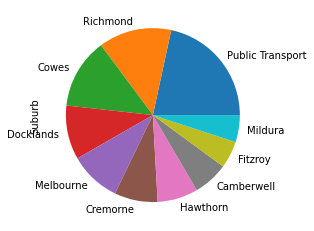

In [69]:
# Example data visualizations

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/exposure_sites.csv", header=0)

plt.figure();

df = df.Suburb.value_counts().nlargest(10)

df.plot(kind='pie')


In [116]:
# Example Cleaning

def copy_df(df):
   return df.copy()

# def drop_missing(df):
#     thresh = len(df) * 0.6
#     df.dropna(axis=1, thresh=thresh, inplace=True)
#     return df

# def remove_outliers(df, column_name):
#     low = np.quantile(df[column_name], 0.05)
#     high = np.quantile(df[column_name], 0.95)
#     return df[df[column_name].between(low, high, inclusive=True)]

def to_category(df):
    cols = df.select_dtypes(include='object').columns
    for col in cols:
        ratio = len(df[col].value_counts()) / len(df)
        if ratio < 0.5:
            df[col] = df[col].astype('category')
    return df

def to_dropped_columns(df, columns=[]):
    return df.drop(columns=columns)

def to_int(df, column):
    df[column] = df[column].astype('Int64')
    return df

def to_datetime(df, datecol, timecol, format="%d/%m/%Y %H:%M:%S"):
    df[datecol] = pd.to_datetime(df[datecol] + ' ' + df[timecol], format=format)
    df[datecol] = df[datecol].astype('datetime64')
    return df

def to_stripped_whitespace(df, columns=[]):
    for column in columns:
        df[column] = df[column].str.strip()
    return df
    

df = pd.read_csv("data/exposure_sites.csv", header=0)

df = (df.
    pipe(copy_df).
    pipe(to_stripped_whitespace, ['Site_title','Site_streetaddress']).
    pipe(to_int, 'Site_postcode').
    pipe(to_datetime, 'Added_date', 'Added_time').
    pipe(to_dropped_columns, ['Exposure_date_dtm','Notes','Added_date_dtm','Added_time','Advice_instruction','Exposure_time_start_24','Exposure_time_end_24']).
    pipe(to_category))

df.dtypes

from datetime import datetime, timedelta

delta = datetime.now() - timedelta(hours = 24)
df = df[(df['Added_date'] > delta) & (df['Added_date'] < datetime.now())]

df.shape

df

,Suburb,Site_title,Site_streetaddress,Site_state,Site_postcode,Exposure_date,Exposure_time,Added_date,Advice_title
403,Fitzroy,Morning Market,59 Gertrude Street,VIC,3065,16/07/2021,12:50pm - 1:30pm,2021-07-24 19:35:00,Tier 2 - Get tested urgently and isolate until...
404,Hawthorn,H Hawthorn Apartment Complex,147 Riversdale Road,VIC,3122,22/07/2021,12:00am - 11:59pm,2021-07-24 19:25:00,Tier 2 - Get tested urgently and isolate until...
